In [1]:
# Importing all required libraries
# !pip install bs4
# !pip install matplotlib
# !pip install seaborn
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import re
from bs4 import BeautifulSoup
from numpy import median

In [2]:
# URL of the site from where data is extracted using request and BeautifulSoup libraries
url = "https://www.google.com/travel/hotels/Mumbai?g2lb=2502548%2C4258168%2C4270442%2C4306835%2C4317915%2C4371335%2C4401769%2C4419364%2C4429192%2C4482438%2C4486153%2C4509341%2C4524134%2C4533547%2C4533548%2C4533882%2C4536454%2C4547627%2C4270859%2C4284970%2C4291517&hl=en-IN&gl=in&cs=1&ssta=1&ap=aAE&q=juhu%20hotels&rp=EMaW74Pl8vaAChCmiL67me393GwQqqT4zp6RhsMSEPOBovqAg7-zBzgBQABIAqIBGUp1aHUsIE11bWJhaSwgTWFoYXJhc2h0cmE&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwjYj-Oj4uHwAhUAAAAAHQAAAAAQBw&utm_campaign=sharing&utm_medium=link&utm_source=htls&ts=CAESABo9Ch8SGzoZSnVodSwgTXVtYmFpLCBNYWhhcmFzaHRyYRoAEhoSFAoHCOUPEAUYGRIHCOUPEAUYGhgBMgIQACoPCgsoAUoCIAE6A0lOUhoA"  # "https://www.travelguru.com/hotels/5-star-hotels-near-juhu-beach-in-mumbai"
r = requests.get(url)
htmlContent = r.content
soup = BeautifulSoup(htmlContent, 'html.parser')
soup

<!DOCTYPE html>
<html dir="ltr" lang="en" prefix="og: http://ogp.me/ns# "><head><base href="https://www.google.com/"/><meta content="origin" name="referrer"/><meta content="true" name="mod"/><meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0,user-scalable=no" name="viewport"/><meta content="Travel - Google" property="og:title"/><meta content="Plan your trip with Google. Find flights, hotels, vacation rentals, things to do, and more." property="og:description"/><meta content="website" property="og:type"/><meta content="https://ssl.gstatic.com/travel-frontend/images/travel_logo_200.png" property="og:image"/><meta content="image/png" property="og:image:type"/><meta content="200" property="og:image:height"/><meta content="200" property="og:image:width"/><meta content="Google travel suitcase logo" property="og:image:alt"/><meta content="https://www.google.com/travel/" property="og:url"/><meta content="yes" name="mobile-web-app-capable"/><meta content="ye

In [3]:
# From the html data specific class data is been extracted usind find_all
price_data = soup.find_all('a', class_="OxGZuc W8vlAc lRagtb")
price_data = list(price_data)
price_data

[<a aria-label="Prices starting from ₹2,318, Hotel Bawa Continental" class="OxGZuc W8vlAc lRagtb" data-href="/entity/CgoI99fO2Zmtq8o3EAEafEFHWklFZ2E2dzgyYzd4NE5FeWFrclktSTloT05nSFcwVXNiRU42ajF2d3ItSHgtdXhzdC1iQ3E3QTZndmlxbGdYc3ZDTEczMWlnUUY0RFl4N2E1ZGxyNjYzRG95dmtRaWozTlJZSVhXczBZMUZhN096QXk3aVRjWF9kMXo" data-hveid="CAIQiwE" href="/travel/hotels/entity/CgoI99fO2Zmtq8o3EAEafEFHWklFZ2E2dzgyYzd4NE5FeWFrclktSTloT05nSFcwVXNiRU42ajF2d3ItSHgtdXhzdC1iQ3E3QTZndmlxbGdYc3ZDTEczMWlnUUY0RFl4N2E1ZGxyNjYzRG95dmtRaWozTlJZSVhXczBZMUZhN096QXk3aVRjWF9kMXo?g2lb=2502548,4258168,4270442,4306835,4317915,4371335,4401769,4419364,4429192,4482438,4486153,4509341,4524134,4533547,4533548,4533882,4536454,4547627,4270859,4284970,4291517&amp;hl=en-IN&amp;gl=in&amp;cs=1&amp;ssta=1&amp;ap=aAE&amp;q=juhu+hotels&amp;rp=EMaW74Pl8vaAChCmiL67me393GwQqqT4zp6RhsMSEPOBovqAg7-zBzgBQABIAqIBGUp1aHUsIE11bWJhaSwgTWFoYXJhc2h0cmE&amp;ictx=1&amp;sa=X&amp;utm_campaign=sharing&amp;utm_medium=link&amp;utm_source=htls&amp;ts=CAESABo9Ch8SG

In [4]:
rating_data = soup.find_all('a', class_="spNMC lRagtb")
rating_data = list(rating_data)
rating_data

[<a aria-label="4.1 out of 5 stars from 1,545 reviews, Hotel Bawa Continental" class="spNMC lRagtb" data-href="/entity/CgoI99fO2Zmtq8o3EAEafEFHWklFZ2E2dzgyYzd4NE5FeWFrclktSTloT05nSFcwVXNiRU42ajF2d3ItSHgtdXhzdC1iQ3E3QTZndmlxbGdYc3ZDTEczMWlnUUY0RFl4N2E1ZGxyNjYzRG95dmtRaWozTlJZSVhXczBZMUZhN096QXk3aVRjWF9kMXo/reviews" data-hveid="CAIQiAE" href="/travel/hotels/entity/CgoI99fO2Zmtq8o3EAEafEFHWklFZ2E2dzgyYzd4NE5FeWFrclktSTloT05nSFcwVXNiRU42ajF2d3ItSHgtdXhzdC1iQ3E3QTZndmlxbGdYc3ZDTEczMWlnUUY0RFl4N2E1ZGxyNjYzRG95dmtRaWozTlJZSVhXczBZMUZhN096QXk3aVRjWF9kMXo/reviews?g2lb=2502548,4258168,4270442,4306835,4317915,4371335,4401769,4419364,4429192,4482438,4486153,4509341,4524134,4533547,4533548,4533882,4536454,4547627,4270859,4284970,4291517&amp;hl=en-IN&amp;gl=in&amp;cs=1&amp;ssta=1&amp;ap=aAE&amp;q=juhu+hotels&amp;rp=EMaW74Pl8vaAChCmiL67me393GwQqqT4zp6RhsMSEPOBovqAg7-zBzgBQABIAqIBGUp1aHUsIE11bWJhaSwgTWFoYXJhc2h0cmE&amp;ictx=1&amp;sa=X&amp;utm_campaign=sharing&amp;utm_medium=link&amp;utm_source=htls&am

In [5]:
# String slicing is done extracting required lines of data
price_list = []
for a in price_data:
    pattern = """
    (?P<Price>[\d].*[\,][\d]+)
    (\,\ )
    (?P<Hotel>.*)
    (\"\ class\=\"OxGZuc\ W8vlAc\ lRagtb\")
    """
    for item in re.finditer(pattern, str(a), re.VERBOSE):
        price_list.append(item.groupdict())
price_list

[{'Price': '2,318', 'Hotel': 'Hotel Bawa Continental'},
 {'Price': '3,937', 'Hotel': 'Hotel Karl Residency'},
 {'Price': '3,701', 'Hotel': 'Novotel Mumbai Juhu Beach'},
 {'Price': '3,716', 'Hotel': 'Hotel Sea Princess'},
 {'Price': '6,500', 'Hotel': 'JW Marriott Mumbai Juhu'},
 {'Price': '2,895', 'Hotel': 'Hotel Milan International'},
 {'Price': '2,904', 'Hotel': 'Ramee Guestline Hotel Juhu'},
 {'Price': '4,819', 'Hotel': 'Sun-n-Sand Hotel, Juhu, Mumbai'},
 {'Price': '2,244', 'Hotel': 'Citizen Hotel'},
 {'Price': '2,347', 'Hotel': 'Hotel Bawa International'},
 {'Price': '2,322', 'Hotel': 'Hotel Bawa Continental'},
 {'Price': '4,767', 'Hotel': 'Grand Hyatt Mumbai Hotel &amp; Residences'}]

In [6]:
rating_list = []        
for a in rating_data:
    pattern = """
    (?P<Rating>[\d+].*)
    (\ out\ of\ 5\ stars\ from\ )
    (?P<Review>.*)
    (\ reviews\,\ )
    (?P<Hotel>.*)
    (\"\ class\=\"spNMC\ lRagtb\")
    """
    for item in re.finditer(pattern, str(a), re.VERBOSE):
        rating_list.append(item.groupdict())
rating_list

[{'Rating': '4.1', 'Review': '1,545', 'Hotel': 'Hotel Bawa Continental'},
 {'Rating': '3.8', 'Review': '2,326', 'Hotel': 'Hotel Karl Residency'},
 {'Rating': '4.3', 'Review': '14,913', 'Hotel': 'Novotel Mumbai Juhu Beach'},
 {'Rating': '4.3', 'Review': '6,553', 'Hotel': 'Hotel Sea Princess'},
 {'Rating': '4.5', 'Review': '21,725', 'Hotel': 'JW Marriott Mumbai Juhu'},
 {'Rating': '3.4', 'Review': '717', 'Hotel': 'Hotel Milan International'},
 {'Rating': '3.9', 'Review': '2,010', 'Hotel': 'Ramee Guestline Hotel Juhu'},
 {'Rating': '4.3',
  'Review': '4,700',
  'Hotel': 'Sun-n-Sand Hotel, Juhu, Mumbai'},
 {'Rating': '4', 'Review': '1,213', 'Hotel': 'Citizen Hotel'},
 {'Rating': '4.3', 'Review': '549', 'Hotel': 'The Park Mumbai Juhu'},
 {'Rating': '4', 'Review': '3,386', 'Hotel': 'Hotel Bawa International'},
 {'Rating': '4.3', 'Review': '727', 'Hotel': 'Juhu Residency Boutique Hotel'},
 {'Rating': '4.1', 'Review': '1,545', 'Hotel': 'Hotel Bawa Continental'},
 {'Rating': '4.5',
  'Review': 

In [7]:
df1 = pd.DataFrame(price_list)
df2 = pd.DataFrame(rating_list)

In [8]:
# Merging two dataframes
df = pd.merge(left=df1, right=df2, how='inner', left_on=df1.Hotel, right_on=df2.Hotel)
df = df.drop_duplicates(subset="key_0")
df = df.reset_index()
df["Hotel"] = df["Hotel_x"]
df = df[['Hotel', 'Rating', 'Review', 'Price']]
df

,Hotel,Rating,Review,Price
0,Hotel Bawa Continental,4.1,"1,545","2,318"
1,Hotel Karl Residency,3.8,"2,326","3,937"
2,Novotel Mumbai Juhu Beach,4.3,"14,913","3,701"
3,Hotel Sea Princess,4.3,"6,553","3,716"
4,JW Marriott Mumbai Juhu,4.5,"21,725","6,500"
5,Hotel Milan International,3.4,717,"2,895"
6,Ramee Guestline Hotel Juhu,3.9,"2,010","2,904"
7,"Sun-n-Sand Hotel, Juhu, Mumbai",4.3,"4,700","4,819"
8,Citizen Hotel,4,"1,213","2,244"
9,Hotel Bawa International,4,"3,386","2,347"


In [9]:
# Converting series data to numeric data
df.Price = df.Price.str.replace(',','')
df.Price = pd.to_numeric(df.Price)
df.Rating = pd.to_numeric(df.Rating)
df.Review = df.Review.str.replace(',','')
df.Review = pd.to_numeric(df.Review)
df

,Hotel,Rating,Review,Price
0,Hotel Bawa Continental,4.1,1545,2318
1,Hotel Karl Residency,3.8,2326,3937
2,Novotel Mumbai Juhu Beach,4.3,14913,3701
3,Hotel Sea Princess,4.3,6553,3716
4,JW Marriott Mumbai Juhu,4.5,21725,6500
5,Hotel Milan International,3.4,717,2895
6,Ramee Guestline Hotel Juhu,3.9,2010,2904
7,"Sun-n-Sand Hotel, Juhu, Mumbai",4.3,4700,4819
8,Citizen Hotel,4.0,1213,2244
9,Hotel Bawa International,4.0,3386,2347


In [10]:
# Sorting dataframe
df = df.sort_values('Price', ascending=False)
df

,Hotel,Rating,Review,Price
4,JW Marriott Mumbai Juhu,4.5,21725,6500
7,"Sun-n-Sand Hotel, Juhu, Mumbai",4.3,4700,4819
10,Grand Hyatt Mumbai Hotel &amp; Residences,4.5,21148,4767
1,Hotel Karl Residency,3.8,2326,3937
3,Hotel Sea Princess,4.3,6553,3716
2,Novotel Mumbai Juhu Beach,4.3,14913,3701
6,Ramee Guestline Hotel Juhu,3.9,2010,2904
5,Hotel Milan International,3.4,717,2895
9,Hotel Bawa International,4.0,3386,2347
0,Hotel Bawa Continental,4.1,1545,2318


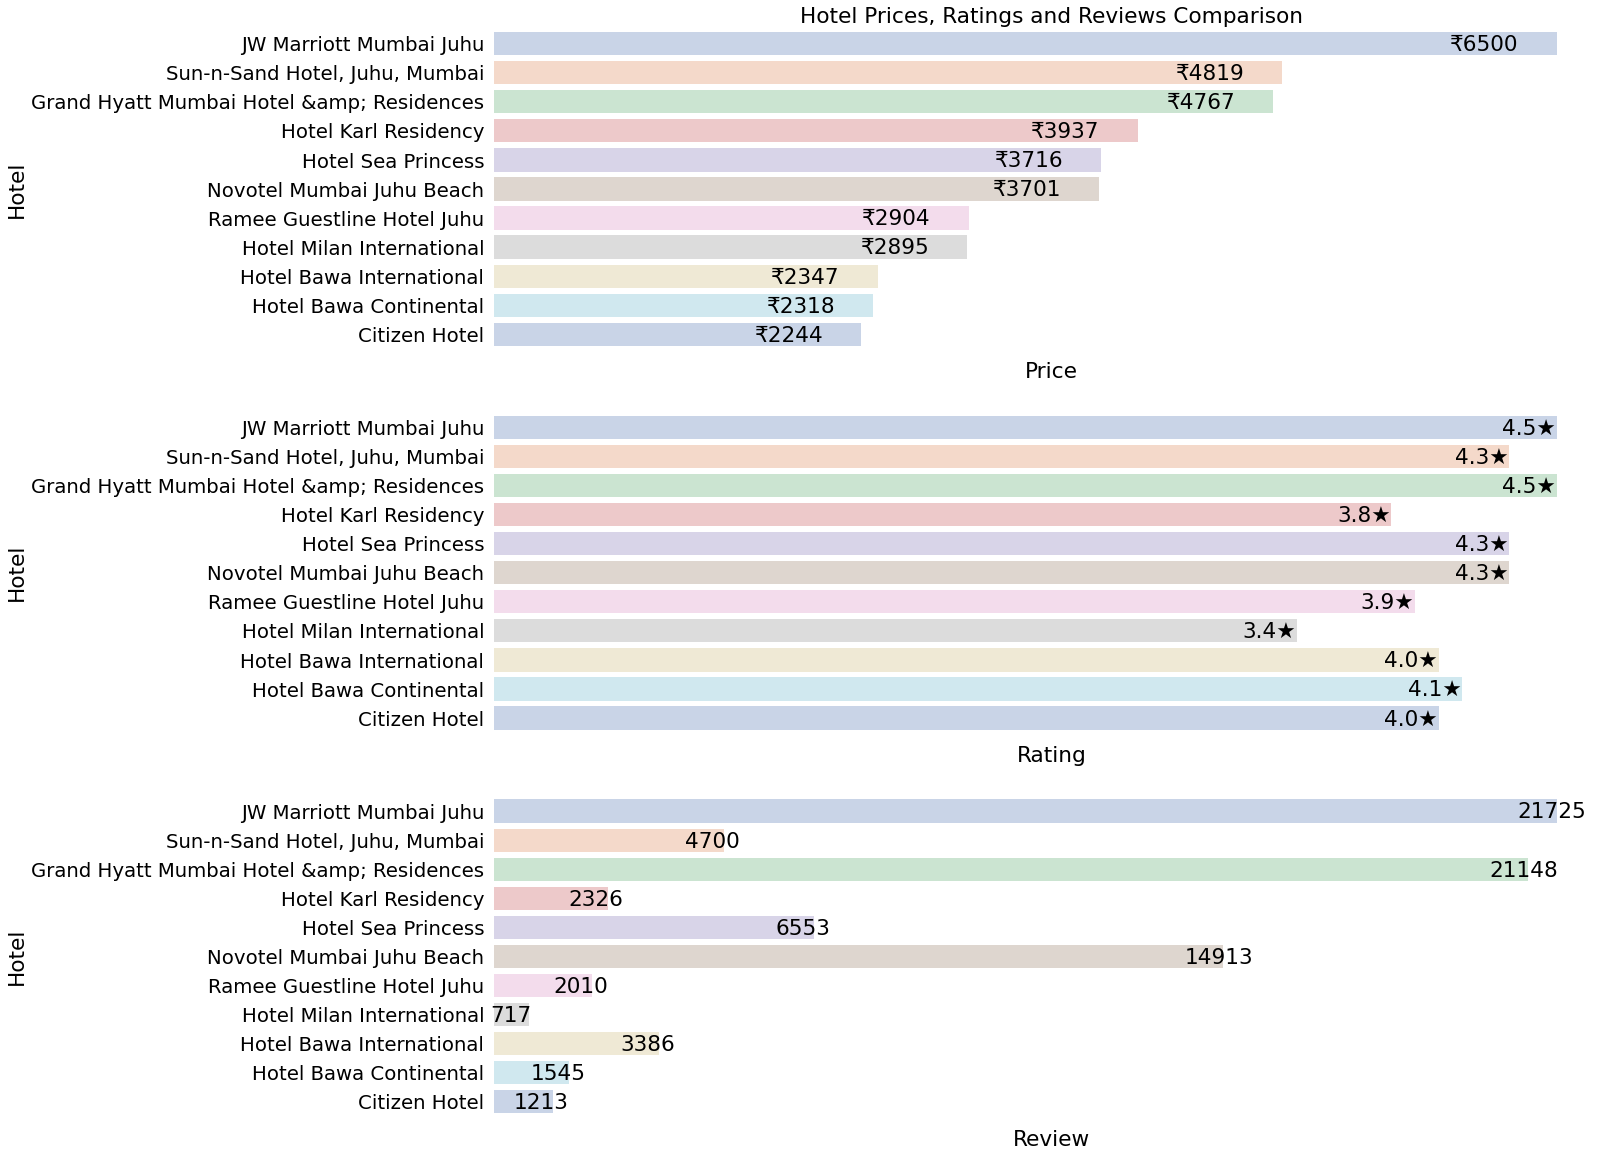

In [11]:
# Plotting graph for price, rating and review comparison
plt.figure(figsize=(20,20))
sns.axes_style('white')
sns.set_color_codes("muted")
sns.set_context("notebook", font_scale=1.8, rc={"lines.linewidth": 1})
# Plot -1
plt.subplot(3,1,1)
sns.despine(left=True, bottom=True)
plt.title('Hotel Prices, Ratings and Reviews Comparison')
plot1 = sns.barplot(x=df.Price, y=df.Hotel, data=df, alpha=.3, estimator=median, ci=None, palette="deep", saturation=2.5)
plot1.tick_params(left=False,bottom=False)
plot1.set(xticklabels=[])
for i, v in enumerate(df.Price):
    plt.text(v - 650, i + .25, u"\u20B9"+str(v), color = 'black')
# Plot -2
plt.subplot(3,1,2)
sns.despine(left=True, bottom=True)
plot2 = sns.barplot(x=df.Rating, y=df.Hotel, data=df, alpha=.3, estimator=median, ci=None, palette="deep", saturation=2.5)
plot2.tick_params(left=False,bottom=False)
plot2.set(xticklabels=[])
for i, v in enumerate(df.Rating):
    plt.text(v - 0.23, i + .25, str(v)+u"\u2605", color = 'black')
# Plot -3
plt.subplot(3,1,3)
sns.despine(left=True, bottom=True)
plot3 = sns.barplot(x=df.Review, y=df.Hotel, data=df, alpha=.3, estimator=median, ci=None, palette="deep", saturation=2.5)
plot3.tick_params(left=False,bottom=False)
plot3.set(xticklabels=[])
for i, v in enumerate(df.Review):
    plt.text(v - 800, i + .25, str(v), color = 'black')